In [1]:
# 导入必要的库
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
# 设置 matplotlib 以支持中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题


In [3]:
# 加载 sklearn 自带的波士顿房价数据集
# 加载 sklearn 自带的加利福尼亚房价数据集
data = fetch_california_housing()
X, y = data.data, data.target

In [4]:
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 数据标准化
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


In [5]:
# 创建 SVR 模型
svr = SVR(kernel='rbf')

# 训练模型
svr.fit(X_train, y_train)

# 进行预测
y_pred = svr.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"均方误差（MSE）: {mse}")
print(f"R^2 分数: {r2}")

均方误差（MSE）: 0.24495938257099284
R^2 分数: 0.7485751571571273


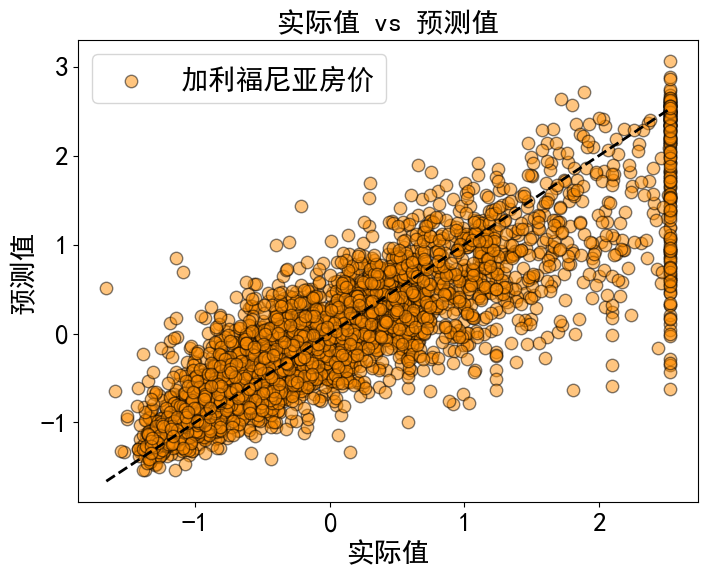

In [6]:
# 绘制预测结果与实际值的对比图
plt.figure(1, figsize=(8, 6))
plt.scatter(y_test, y_pred, s=80, edgecolor="black", c="darkorange", alpha=0.5, label="加利福尼亚房价")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('实际值', fontsize=20)
plt.ylabel('预测值', fontsize=20)
plt.legend(loc="upper left", fontsize=20)
plt.title('实际值 vs 预测值', fontsize=20)
plt.tick_params(axis='both', labelsize=20)  # 调整 X 轴和 Y 轴的刻度标签大小
plt.savefig('支持向量回归.png', dpi=300, bbox_inches='tight')
plt.show()